<a href="https://colab.research.google.com/github/ithabi/AAA/blob/main/AAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET AAA : PREDICTION DU SUCCÈS D'UN FILM

Fait avec Google Colab : https://colab.research.google.com/drive/1S9Z8ZcMf_GECJlyPaH_j6ng17Giuw1Vb?usp=sharing

# Notre projet et objectif :

Nous avons décidé d'étudier The Movies Dataset , qui réunit des données sur plus de 40 000 films, et notamment plusieurs milions de notes de spectateurs. Notre but est de créer un modèle pertinent de prédiction la note moyenne des films.

(https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)


# Chargement des données et data exploration
Pour ouvrir le dataset sur google colab, il faut avoir un compte kaggle et éxécuter les 2 cellules ci dessous

In [ ]:
#command lines pour google colab
!pip install -q kaggle
!pip install -q opendatasets

In [ ]:
#il faut avoir un compte kaggle !
import opendatasets
opendatasets.download(
    "https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: grsgrsrsg
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset


100%|██████████| 228M/228M [00:00<00:00, 677MB/s] 

In [ ]:
import pandas as pd
movies = pd.read_csv('the-movies-dataset/movies_metadata.csv', low_memory=False)
# low_memory=False permet d'éviter des warnings sur les types mixtes
credits = pd.read_csv('the-movies-dataset/credits.csv')
keywords = pd.read_csv('the-movies-dataset/keywords.csv')
ratings = pd.read_csv('the-movies-dataset/ratings.csv')
links = pd.read_csv('the-movies-dataset/links.csv')

Maintenant que le dataset est chargé, explorons les fichiers qui nous intéressent pour le moment : movies qui contient les films, ratings contient les avis et links permet de faire la jointure entre les 2 fichiers

In [ ]:
movies.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
movies.describe()


,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>]], dtype=object)

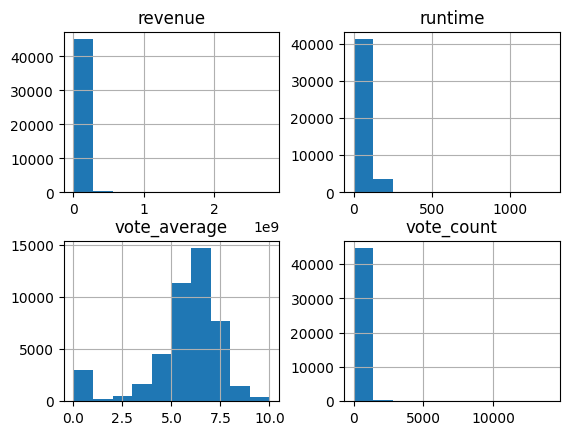

In [ ]:
movies.hist()

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
ratings.describe()


,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


# Premier Modèle linéaire

Commençons par un premier modèle linéaire. On va faire d'abord créer la target grâce à '*ratings*' lié à '*movies*' par '*links*'.

la jointure ne fonctionne pas directement à cause d'un problème de typage, il faut donc qu'on transforme tout les id en amont

In [ ]:
def clean_id_column(dataframe, col_name):
    dataframe[col_name] = pd.to_numeric(dataframe[col_name], errors='coerce')
    dataframe.dropna(subset=[col_name], inplace=True)
    dataframe[col_name] = dataframe[col_name].astype(int)
    return dataframe

movies = clean_id_column(movies, 'id')
links = clean_id_column(links, 'tmdbId')
links = clean_id_column(links, 'movieId')
credits = clean_id_column(credits, 'id')

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

In [ ]:
#on crée la feature target et joint les tables  grace à links
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.rename(columns={'rating': 'target_rating'}, inplace=True)
df_temp = pd.merge(movies, links, left_on='id', right_on='tmdbId', how='inner')
df_final = pd.merge(df_temp, avg_ratings, on='movieId', how='inner')

print(f"{df_final.shape[0]} films après nettoyage")



df_final['budget'] = pd.to_numeric(df_final['budget'], errors='coerce')
df_final['runtime'] = pd.to_numeric(df_final['runtime'], errors='coerce')
df_final['popularity'] = pd.to_numeric(df_final['popularity'], errors='coerce')
numerical_features = ['budget', 'runtime', 'popularity']

top_languages = df_final['original_language'].value_counts().index[:10] #les langues sont soit dans le top 10 soit autres
df_final['original_language'] = df_final['original_language'].apply(lambda x: x if x in top_languages else 'other')
categorical_features = ['original_language']

preprocessor = ColumnTransformer(
    transformers=[('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_features),
     ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)])

model = Pipeline([('preprocessor', preprocessor),('regressor', Ridge(alpha=1.0))])

X = df_final[numerical_features + categorical_features]
y = df_final['target_rating']

# On utilise cross_validate au lieu de cross_val_score pour avoir plusieurs métriques
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(model, X, y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])

rmse_scores = -results['test_neg_root_mean_squared_error']
r2_scores = results['test_r2']


print(f"RMSE Moyen : {rmse_scores.mean():.4f} ")
print(f"R² Moyen   : {r2_scores.mean():.4f} ")


44803 films après nettoyage
RMSE Moyen : 0.7183 
R² Moyen   : 0.0319 


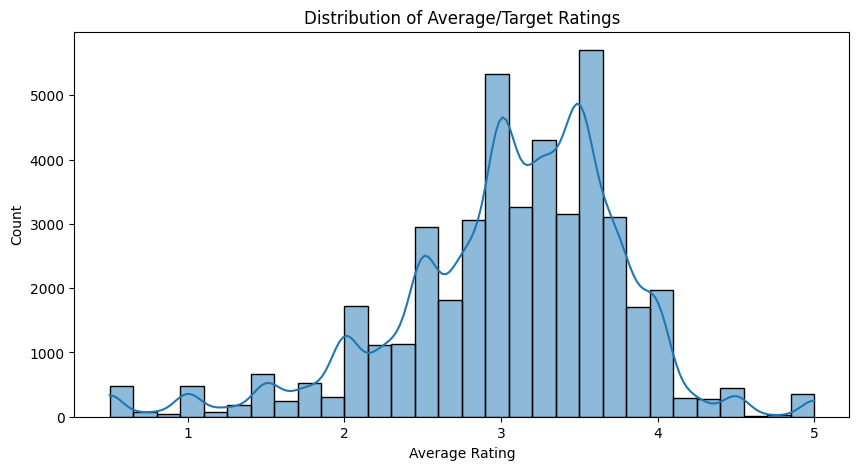

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(df_final['target_rating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Average/Target Ratings")
plt.xlabel("Average Rating")
plt.show()

In [ ]:
from sklearn import set_config
set_config(display="diagram")
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['budget', 'runtime',
                                                   'popularity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['original_language'])])),
                ('regressor', Ridge())])

# Deuxième modèle linéaire
On constate que nos critères d'évaluation sont insatisfaisants pour le premier modèle (rmse = 0.7 et r²=0.03). Cela peut s'expliquer par notre mauvais choix de features (budget, runtime popularity et original language).

Pour améliorer notre pipeline commencons par changer les features prises en compte : on ajoute 'year', 'director_experience',primary_genre' et 'top_director'. On retire budget car trop de films sont sans budget.

Commençons donc par créer ces features

In [ ]:
import ast
def get_primary_genre(x):
    try:
        genres = ast.literal_eval(x)
        if genres:
            return genres[0]['name'] # On prend le premier de la liste
    except:
        pass
    return 'Unknown'

def get_director(x):
    try:
        crew = ast.literal_eval(x)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
    except:
        pass
    return 'Unknown'
movies['primary_genre'] = movies['genres'].apply(get_primary_genre)
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year
credits['director'] = credits['crew'].apply(get_director)

movies_with_director = pd.merge(movies, credits[['id', 'director']], on='id', how='inner')
df_temp = pd.merge(movies_with_director, links, left_on='id', right_on='tmdbId', how='inner')


# On ne garde que les films avec > 30 votes
vote_counts = ratings.groupby('movieId').count()['rating']
valid_movies = vote_counts[vote_counts >= 30].index
avg_ratings = ratings[ratings['movieId'].isin(valid_movies)].groupby('movieId')['rating'].mean().reset_index()
avg_ratings.rename(columns={'rating': 'target_rating'}, inplace=True)


df_final = pd.merge(df_temp, avg_ratings, on='movieId', how='inner')
print(f"Dataset Final : {df_final.shape[0]} films")

# Comme pour la langue, on garde le nom si c'est un top 50 réalisateur
director_counts = df_final['director'].value_counts()
df_final['director_experience'] = df_final['director'].map(director_counts)
top_directors = director_counts.head(50).index
df_final['top_director'] = df_final['director'].apply(lambda x: x if x in top_directors else 'Other')

df_final['runtime'] = pd.to_numeric(df_final['runtime'], errors='coerce')
df_final['popularity'] = pd.to_numeric(df_final['popularity'], errors='coerce')



Dataset Final : 14721 films


In [ ]:
numeric_features = ['runtime', 'popularity', 'year', 'director_experience']
categorical_features = ['original_language', 'primary_genre', 'top_director']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=100.0))
    #alpha=100 à été choisi gràce à gris search plus loin dans le notebook
])

X = df_final[numeric_features + categorical_features]
y = df_final['target_rating']

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(model, X, y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])

rmse_scores = -results['test_neg_root_mean_squared_error']
r2_scores = results['test_r2']

print(f"RMSE Moyen : {rmse_scores.mean():.4f}")
print(f"R² Moyen   : {r2_scores.mean():.4f}")

RMSE Moyen : 0.4237
R² Moyen   : 0.2454


In [ ]:
from sklearn import set_config
set_config(display="diagram")
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runtime', 'popularity',
                                                   'year',
                                                   'director_experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['original_language',
                                                   'primary_genre',
                                                   'top_director'])])),
                ('regressor', Ridge(alpha=100.0))])

Les résultats sont beaucoup plus satisfaisants : le rmse est passé d'environ 0.7 à 0.4 tandis que le r² est passé de 0.03 à 0.24, c'est nettement plus satisfaisaisant mais on peut faire mieux encore.

# Grid search pour optimiser un hyperparamètre

Dans notre modèle précédent nous avons introduit arbitaitrement 2 variables :
le nombre d'avis nécessaire pour un film servant au training (30)
le nombre de réalisateur considérés comme top réalisateur (50).

On ne peut faire de **grid search** sur le premier paramètre car il change la taille de la target.(On a donc choisit 30 après plusieurs essais empiriques)


Cependant on peut faire un grid search sur l'autre hyperparamètre, voyons si 50 est la valeur optimale.

**Pour l'instant le grid search n'optimise que alpha**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__alpha": (0.1, 1.0, 10.0, 100.0)}
model_grid_search = GridSearchCV(model,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error',return_train_score=True)
model_grid_search.fit(X, y)


print(f"Meilleur RMSE : {-model_grid_search.best_score_:.4f}")
print(f"Meilleur alpha : {model_grid_search.best_params_}")
#remarque le resultat semble différent avec un kfold(à approfondir...)
#ajouter ici une optimisation du parametre top 50 realisateur

Meilleur RMSE : 0.4365
Meilleur alpha : {'regressor__alpha': 100.0}


# Troisième modèle : Réseau de neurones

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


numerical_features_nn = ['runtime', 'popularity', 'year', 'director_experience']
categorical_features_nn = ['original_language', 'primary_genre', 'top_director']
target_nn = 'target_rating'

df_final_nn = df_final.dropna(subset=[target_nn]).copy()

X_nn = df_final_nn[numerical_features_nn + categorical_features_nn]
y_nn = df_final_nn[target_nn]

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42
)

preprocessor_nn = ColumnTransformer(transformers=[('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
 ('scaler', StandardScaler())]), numerical_features_nn),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features_nn)])

X_train_processed_nn = preprocessor_nn.fit_transform(X_train_nn)
X_test_processed_nn = preprocessor_nn.transform(X_test_nn)


X_train_tensor = torch.tensor(X_train_processed_nn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_nn.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test_processed_nn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_nn.values, dtype=torch.float32).reshape(-1, 1)

val_size = int(0.2 * len(X_train_tensor)) # 20% des données d'entraînement pour la validation
train_size = len(X_train_tensor) - val_size

train_dataset_raw, val_dataset_raw = torch.utils.data.random_split(
    TensorDataset(X_train_tensor, y_train_tensor), [train_size, val_size]
)

train_dataset = train_dataset_raw
val_dataset = val_dataset_raw
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Définition du modèle de réseau de neurones PyTorch
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(128, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1) # Sortie unique pour la régression

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.output_layer(x)
        return x

input_size = X_train_processed_nn.shape[1]
model_nn = NeuralNetwork(input_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model_nn.to(device)

n_epochs = 100
patience = 10
min_val_loss = float('inf')
patience_counter = 0
best_model_state = None

history_nn = {'train_loss': [], 'val_loss': [], 'train_rmse': [], 'val_rmse': []}

for epoch in range(n_epochs):
    model_nn.train() # Mettre le modèle en mode entraînement
    train_loss_epoch = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model_nn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item() * inputs.size(0)

    # Calculer la perte moyenne d'entraînement
    avg_train_loss = train_loss_epoch / len(train_loader.dataset)
    history_nn['train_loss'].append(avg_train_loss)
    history_nn['train_rmse'].append(np.sqrt(avg_train_loss))

    # Étape de validation
    model_nn.eval() # Mettre le modèle en mode évaluation
    val_loss_epoch = 0.0
    all_val_preds = []
    all_val_targets = []
    with torch.no_grad(): # Désactiver le calcul du gradient pour la validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_nn(inputs)
            loss = criterion(outputs, targets)
            val_loss_epoch += loss.item() * inputs.size(0)
            all_val_preds.extend(outputs.cpu().numpy())
            all_val_targets.extend(targets.cpu().numpy())

    # Calculer la perte moyenne de validation
    avg_val_loss = val_loss_epoch / len(val_loader.dataset)
    history_nn['val_loss'].append(avg_val_loss)
    history_nn['val_rmse'].append(np.sqrt(avg_val_loss))

    print(f"Epoch {epoch+1}/{n_epochs}, Perte d'entraînement: {avg_train_loss:.4f}, Perte de validation: {avg_val_loss:.4f}")

    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        patience_counter = 0
        best_model_state = model_nn.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"{epoch+1} époques : aucune amélioration de la perte de validation.\n")
            model_nn.load_state_dict(best_model_state)
            break


model_nn.eval() # Mettre le modèle en mode évaluation
all_test_preds = []
all_test_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_nn(inputs)
        all_test_preds.extend(outputs.cpu().numpy())
        all_test_targets.extend(targets.cpu().numpy())

y_pred_nn = np.array(all_test_preds).flatten()
y_test_np = np.array(all_test_targets).flatten()

rmse_nn = np.sqrt(mean_squared_error(y_test_np, y_pred_nn))
r2_nn = r2_score(y_test_np, y_pred_nn)

print(f"RMSE du réseau de neurones sur l'ensemble de test : {rmse_nn:.4f}")
print(f"R² du réseau de neurones sur l'ensemble de test   : {r2_nn:.4f}\n")


cpu
Epoch 1/100, Perte d'entraînement: 1.0350, Perte de validation: 0.1759
Epoch 2/100, Perte d'entraînement: 0.1744, Perte de validation: 0.1806
Epoch 3/100, Perte d'entraînement: 0.1709, Perte de validation: 0.1661
Epoch 4/100, Perte d'entraînement: 0.1654, Perte de validation: 0.1617
Epoch 5/100, Perte d'entraînement: 0.1623, Perte de validation: 0.1636
Epoch 6/100, Perte d'entraînement: 0.1631, Perte de validation: 0.1872
Epoch 7/100, Perte d'entraînement: 0.1621, Perte de validation: 0.1604
Epoch 8/100, Perte d'entraînement: 0.1615, Perte de validation: 0.1617
Epoch 9/100, Perte d'entraînement: 0.1579, Perte de validation: 0.1616
Epoch 10/100, Perte d'entraînement: 0.1531, Perte de validation: 0.1667
Epoch 11/100, Perte d'entraînement: 0.1571, Perte de validation: 0.1668
Epoch 12/100, Perte d'entraînement: 0.1639, Perte de validation: 0.1603
Epoch 13/100, Perte d'entraînement: 0.1522, Perte de validation: 0.1616
Epoch 14/100, Perte d'entraînement: 0.1513, Perte de validation: 0.15

Le score **R² de environ 0.35** est satisfaisant, surtout en comparaison de nos précédents modèles, le **RMSE** est également le meilleur qu'on ait eu (environ **0.38**). Ce modèle de réseau de neurones constitut ainsi une réelle avancée dans notre projet.